# <font color='red'> Modelos de Regresión Lineal <font>
   
## Modelo con datos simulados

* y= a +b*x
* x: 100 valores distribuidos según una N~(1.5,2.5)
* Ye = 5+ 1.9*x + e
* e estará distribuido según un N~(0,0.8) # Tiene que estar centrada en cero.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")

In [2]:
# 1.5+2.5*np.random.randn(1000)
x = np.random.normal(loc=1.5,scale=2.5,size=1000)

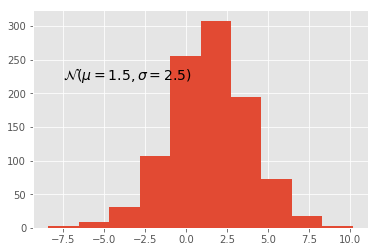

In [3]:
fig,ax = plt.subplots(1,1)
ax.hist(x)
plt.text(-7.5,220,r"$\mathcal{N}(\mu = 1.5,\sigma= 2.5)$",fontsize=14)
plt.show()

In [4]:
res = 0+0.8*np.random.randn(1000) # Error

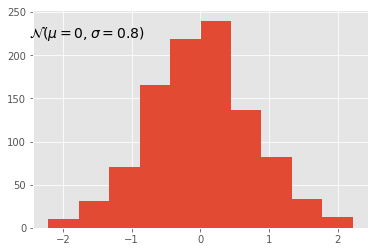

In [5]:
fig,ax = plt.subplots(1,1)
ax.hist(res)
plt.text(-2.5,220,r"$\mathcal{N}(\mu = 0 ,\sigma= 0.8)$",fontsize=14)
plt.show()

In [6]:
y_act = 5+1.9*x+res

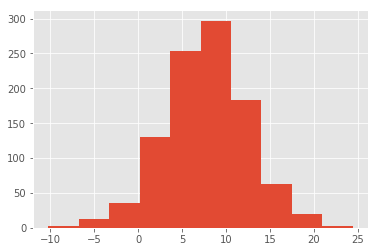

In [7]:
fig,ax = plt.subplots(1,1)
ax.hist(y_act)
plt.show()

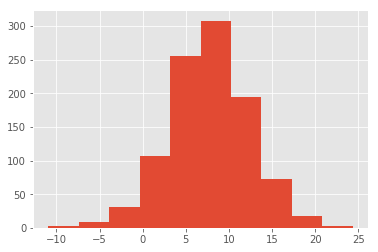

In [8]:
y_pred = 5+1.9*x
fig,ax = plt.subplots(1,1)
ax.hist(y_pred)
plt.show()

In [9]:
x_list = x.tolist()
y_pred_list = y_pred.tolist()
y_actual_list = y_act.tolist()

In [10]:
data = pd.DataFrame({
    "X":x_list,
    "Y_actual":y_actual_list,
    "Y_prediction":y_pred_list
})
data.head()

,X,Y_actual,Y_prediction
0,1.542338,7.011956,7.930442
1,-3.465242,-1.228953,-1.583960
2,3.560620,11.617816,11.765177
3,5.258257,14.437011,14.990687
4,-2.807264,-0.465945,-0.333801


In [11]:
y_mean = [np.mean(y_act) for i in range(1,len(x_list)+1)]

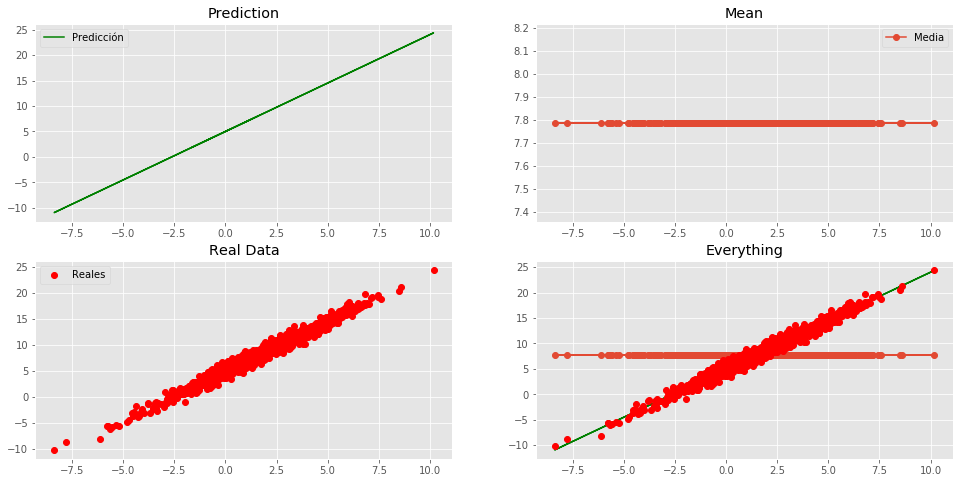

In [12]:
fig,axes= plt.subplots(2,2,figsize=(10,8))

axes[0,0].plot(x,y_pred,'g',label="Predicción")
axes[0,1].plot(x,y_mean,'o-',label="Media") # Es el promedio
axes[1,0].plot(x,y_act,'ro',label="Reales")
axes[1,1].plot(x,y_pred,'g')
axes[1,1].plot(x,y_mean,'o-') # Es el promedio
axes[1,1].plot(x,y_act,'ro')
axes[0,0].legend();axes[0,1].legend();axes[1,0].legend();axes[0,1].legend()
axes[0,0].set_title("Prediction");axes[0,1].set_title("Mean");axes[1,0].set_title("Real Data");axes[1,1].set_title("Everything")
plt.subplots_adjust(right=1.4)
plt.show()

## ¿Como es la predicción de buena?
* SST = SSD + SSR
* SST : Variabilidad de los datos con respecto de su media
* SSD : Diferencia entre los datos originales y las predicciones que el modelo no es capaz de explicar (errores que deberían seguir una distribución normal)
* SSR : Diferencia entre la regresión y el valor medio que el modelo busca explicar
* R2 = SSR / SST, coeficiente de determinación entre 0 y 1

In [13]:
data["SSR"]=(data.Y_prediction-np.mean(y_act))**2
data["SSD"] = (data.Y_actual-data.Y_prediction)**2
data["SST"] = (data.Y_actual-np.mean(y_act))**2

In [14]:
data.head()

,X,Y_actual,Y_prediction,SSR,SSD,SST
0,1.542338,7.011956,7.930442,0.020413,0.843617,0.601577
1,-3.465242,-1.228953,-1.583960,87.825579,0.126030,81.297687
2,3.560620,11.617816,11.765177,15.821361,0.021715,14.670790
3,5.258257,14.437011,14.990687,51.884905,0.306557,44.215071
4,-2.807264,-0.465945,-0.333801,65.956669,0.017462,68.120500


### $$\sum_{i=1}^n (y_i-\bar{y})^2 = \sum_{i=1}^n (y_i-\hat{y}_i)^2+ \sum_{i=1}^n (\hat{y}_i-\bar{y})^2$$

In [15]:
SSR = sum(data.SSR)
SSD = sum(data.SSD)
SST = sum(data.SST)
SSR,SSD,SST

(21742.26741755821, 566.6077086912857, 22379.557879042575)

In [16]:
SSR+SSD

22308.875126249495

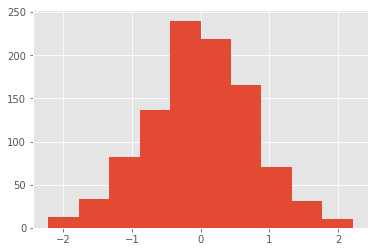

In [17]:
plt.hist(data.Y_prediction-data.Y_actual)
plt.show()

In [18]:
R2= SSR/SST
R2

0.9715235455084142

## Obteniendo la recta de regresión 

* y = a + b * x
* b = $\sum((xi - x_m)*(y_i-y_m))/\sum((xi-x_m)^2)$
* a = y_m - b * x_m

In [19]:
x_mean= np.mean(data.X)
y_mean = np.mean(data.Y_actual)
x_mean,y_mean

(1.4631274970076955, 7.78756976855645)

In [20]:
data["beta_n"] = (data.X-x.mean())*(data.Y_actual-y_mean)
data["beta_d"] = (data.X-x.mean())**2

In [21]:
beta = sum(data.beta_n)/sum(data.beta_d)
beta

1.903093483038243

In [22]:
alpha = y_mean-beta*x_mean
alpha

5.003101364147048

#### El model final obtenido por la regresión es:
* y = 4.983919152093856 + 1.9014668609225296*x

In [23]:
data["y_model"]=alpha+beta*x

In [24]:
data.head()

,X,Y_actual,Y_prediction,SSR,SSD,SST,beta_n,beta_d,y_model
0,1.542338,7.011956,7.930442,0.020413,0.843617,0.601577,-0.061437,0.006274,7.938315
1,-3.465242,-1.228953,-1.583960,87.825579,0.126030,81.297687,44.436760,24.288829,-1.591579
2,3.560620,11.617816,11.765177,15.821361,0.021715,14.670790,8.033912,4.399473,11.779293
3,5.258257,14.437011,14.990687,51.884905,0.306557,44.215071,25.235488,14.403005,15.010055
4,-2.807264,-0.465945,-0.333801,65.956669,0.017462,68.120500,35.245737,18.236242,-0.339384


In [25]:
SSR = sum((data["y_model"]-y_mean)**2)
SSD = sum((data["y_model"]-data["Y_actual"])**2)
SST = sum((data["Y_actual"]-y_mean)**2)

In [26]:
SSR+SSD,SST

(22379.55787904265, 22379.557879042575)

In [27]:
R2 = SSR/SST
R2

0.9746870828781712

In [28]:
(SSR+SSD)/SST

1.0000000000000033

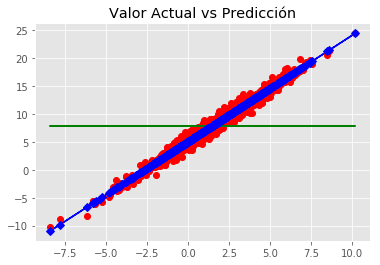

In [29]:
y_mean = [np.mean(y_act) for i in range(1, len(x_list) + 1)]

%matplotlib inline
plt.plot(data["X"],data["Y_prediction"],"b")
plt.plot(data["X"], data["Y_actual"], "ro")
plt.plot(data["X"],y_mean, "g")
plt.plot(data["X"], data["y_model"],"bD")
plt.title("Valor Actual vs Predicción")
plt.show()

### Error estándar de los residuos (RSE)

In [30]:
RSE= np.sqrt(SSD/(len(data)-2))
RSE

0.7534103451052918

In [31]:
np.mean(data.Y_actual)

7.78756976855645

In [32]:
RSE/np.mean(data.Y_actual)

0.09674524498609384